# AOC2022

## Day 14 / Part 1 / Regolith Reservoir

Problem Description: https://adventofcode.com/2022/day/14

Input: [Example](aoc2022_day14_example.txt)

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
"""Solution for AOC2022, day 14, part 1."""
import logging
import sys
import matplotlib.pyplot as plt
import numpy as np

LOGGER = logging.getLogger(__name__)
plt.rcParams["figure.figsize"] = [2, 2]

# show/hide overview
SHOW_OVERVIEW = True
# show/hide debug logs
SHOW_DEBUG_LOG = False
# set input file
INPUT_FILE = "aoc2022_day14_example.txt"

In [3]:
SAND_SRC = (0, 500)

In [4]:
def calc_sand_units(cave, y_pos, x_pos):
    """
    Calculate units of sand in a cave produced by a source at (y_pos, x_pos).

    Side-effect: adds the sand units to the cave map.
    """
    LOGGER.debug(
        "  simulate falling sand with source (%s, %s)...", y_pos, x_pos
    )
    try:
        return _calc_sand_units(cave, y_pos, x_pos)
    except RecursionError as ex:
        return ex.args[0]


def _calc_sand_units(cave, y_pos, x_pos):
    """Helper function for calc_sand_units(cave, y_pos, x_pos)."""
    units = 0
    try:
        if cave[y_pos+1, x_pos] == 0:
            units += _calc_sand_units(cave, y_pos+1, x_pos)
        if cave[y_pos+1, x_pos-1] == 0:
            units += _calc_sand_units(cave, y_pos+1, x_pos-1)
        if cave[y_pos+1, x_pos+1] == 0:
            units += _calc_sand_units(cave, y_pos+1, x_pos+1)
    except (RecursionError, IndexError) as ex:
        if isinstance(ex, IndexError):
            # sand unit falls bellow cave boundary
            raise RecursionError(units) from ex
        raise RecursionError(int(ex.args[0]) + units) from ex

    cave[y_pos, x_pos] = 2

    LOGGER.debug("    unit of sand rests at (%s, %s)", y_pos, x_pos)
    return units + 1

In [5]:
def main():
    """Main function to solve puzzle."""
    min_y, max_y = np.inf, 0
    min_x, max_x = np.inf, 0
    struct_paths = []
    with open(INPUT_FILE, encoding="utf-8") as file_obj:
        for line in [
            line.rstrip() for line in file_obj.readlines()
        ] + [
            str(SAND_SRC[1]) + "," + str(SAND_SRC[0])
        ]:
            struct_path = []
            for x_pos, y_pos in [
                coords.split(",") for coords in line.split(" -> ")
            ]:
                y_pos, x_pos = int(y_pos), int(x_pos)
                min_y, max_y = min(y_pos, min_y), max(y_pos, max_y)
                min_x, max_x = min(x_pos, min_x), max(x_pos, max_x)
                struct_path.append([y_pos, x_pos])
            struct_paths.append(struct_path)

    cave = np.zeros((max_y - min_y + 1, max_x - min_x + 1))

    for struct_path in struct_paths:
        for coords_idx in range(len(struct_path) - 1):
            y_poss, x_poss = zip(
                struct_path[coords_idx], struct_path[coords_idx + 1]
            )
            y_poss = list(map(lambda y_pos: y_pos - min_y, y_poss))
            x_poss = list(map(lambda x_pos: x_pos - min_x, x_poss))
            cave[min(y_poss):max(y_poss)+1, min(x_poss):max(x_poss)+1] = 1

    units = calc_sand_units(cave, SAND_SRC[0] - min_y, SAND_SRC[1] - min_x)

    LOGGER.debug("")

    if SHOW_OVERVIEW:
        print("overview:")
        plt.imshow(cave)
        plt.ylabel(" ")
        plt.show()

    print(f"solution: {units}")

overview:


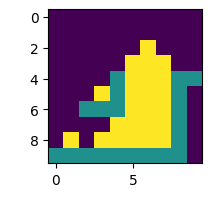

solution: 24


In [6]:
if __name__ == "__main__":
    LOGGER.setLevel(logging.DEBUG if SHOW_DEBUG_LOG else logging.INFO)
    log_formatter = logging.Formatter("%(message)s")
    log_handler = logging.StreamHandler(sys.stdout)
    log_handler.setFormatter(log_formatter)
    LOGGER.addHandler(log_handler)
    main()